In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing

In [13]:
df=pd.read_csv('star_classification.csv')
df = df.drop(['obj_ID','alpha','delta','run_ID','rerun_ID','cam_col','field_ID','spec_obj_ID','plate','MJD','fiber_ID'], axis='columns')

df_clean = df[(df['u'] >= 0)]
#df_clean = df[(df['g'] >= 0)]
#df_clean = df[(df['z'] >= 0)]

print(df.describe())
print(df_clean.describe())


                   u              g              r              i  \
count  100000.000000  100000.000000  100000.000000  100000.000000   
mean       21.980468      20.531387      19.645762      19.084854   
std        31.769291      31.750292       1.854760       1.757895   
min     -9999.000000   -9999.000000       9.822070       9.469903   
25%        20.352353      18.965230      18.135828      17.732285   
50%        22.179135      21.099835      20.125290      19.405145   
75%        23.687440      22.123767      21.044785      20.396495   
max        32.781390      31.602240      29.571860      32.141470   

                   z       redshift  
count  100000.000000  100000.000000  
mean       18.668810       0.576661  
std        31.728152       0.730707  
min     -9999.000000      -0.009971  
25%        17.460677       0.054517  
50%        19.004595       0.424173  
75%        19.921120       0.704154  
max        29.383740       7.011245  
                  u             g   

In [14]:
#turning the Class values into categorical data
df_clean=df_clean.rename(columns = {'class':'Class'})
df_clean.Class = df_clean.Class.astype('category')
cat_columns = df_clean.select_dtypes(['category']).columns
cat_columns
df_clean[cat_columns] = df_clean[cat_columns].apply(lambda x: x.cat.codes)
print(df_clean.head(10))

          u         g         r         i         z  Class  redshift
0  23.87882  22.27530  20.39501  19.16573  18.79371      0  0.634794
1  24.77759  22.83188  22.58444  21.16812  21.61427      0  0.779136
2  25.26307  22.66389  20.60976  19.34857  18.94827      0  0.644195
3  22.13682  23.77656  21.61162  20.50454  19.25010      0  0.932346
4  19.43718  17.58028  16.49747  15.97711  15.54461      0  0.116123
5  23.48827  23.33776  21.32195  20.25615  19.54544      1  1.424659
6  21.46973  21.17624  20.92829  20.60826  20.42573      1  0.586455
7  22.24979  22.02172  20.34126  19.48794  18.84999      0  0.477009
8  24.40286  22.35669  20.61032  19.46490  18.95852      0  0.660012
9  21.74669  20.03493  19.17553  18.81823  18.65422      2 -0.000008


In [15]:
#creating a subset of the training data

train = df_clean

#subset the dataframe
train['Class'] = train['Class'].astype('category')

train['Class_code'] = train['Class'].cat.codes
sub1 = train[train['Class_code'] == train['Class'].cat.categories.get_loc(1)]

#creating a subset of galaxies sub0
n_sub1 = len(sub1)
sub0_all = train[train['Class_code'] == train['Class'].cat.categories.get_loc(0)]
sub0 = sub0_all.sample(n=n_sub1, random_state=42)  

#creating a subset of stars sub2
sub2_all = train[train['Class_code'] == train['Class'].cat.categories.get_loc(2)]
sub2 = sub2_all.sample(n=n_sub1, random_state=42)  

#merge the subsets
sub=pd.concat([sub0, sub1, sub2], axis=0)

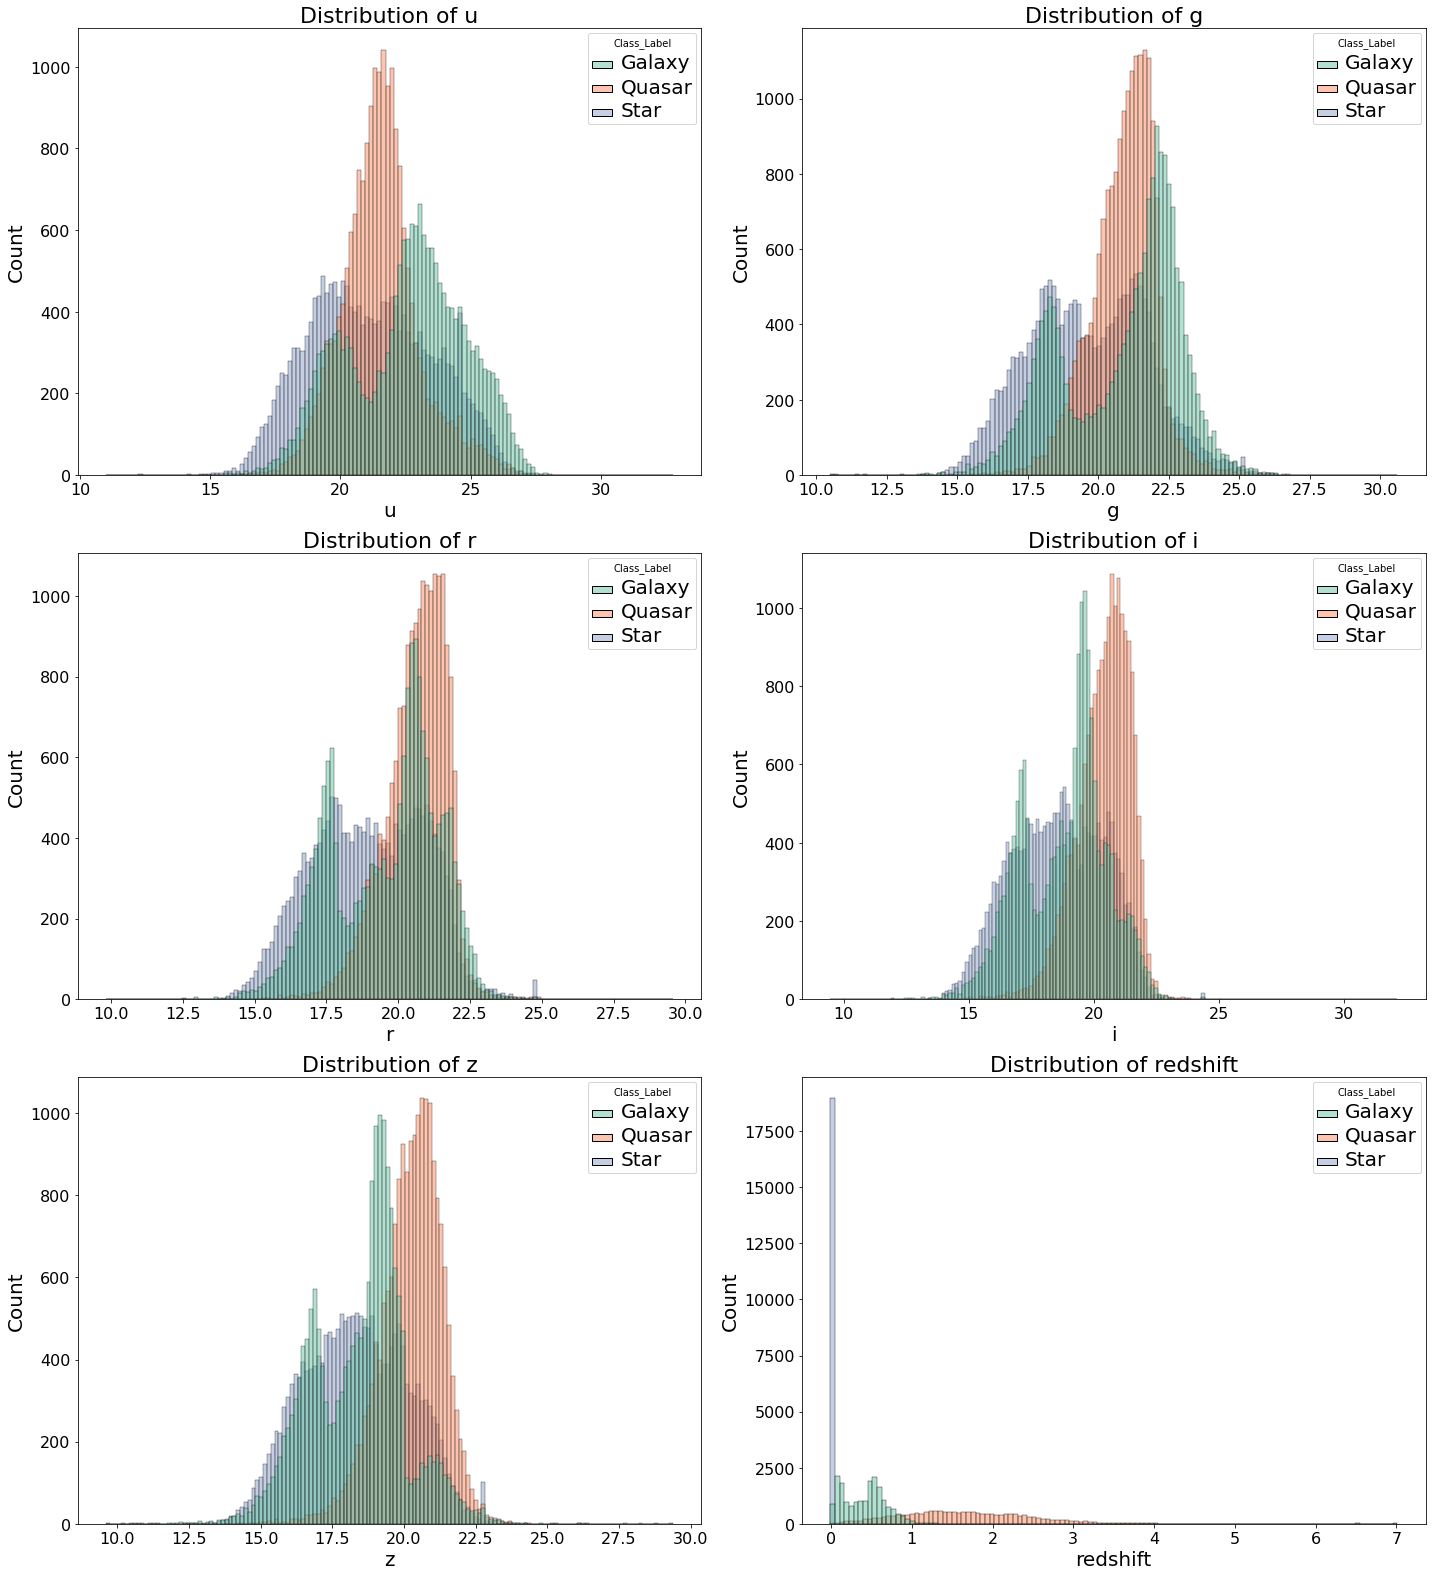

In [21]:
features = ['u', 'g', 'r', 'i', 'z', 'redshift']
target = 'Class' 
# Define class label mapping
class_labels = {0: 'Galaxy', 1: 'Quasar', 2: 'Star'}
sub['Class_Label'] = sub['Class'].map(class_labels)  # Create a new column with mapped labels

# Create a 2x3 grid of subplots
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(20, 22))
axes = axes.flatten()

# Loop through features and plot histograms
for idx, feature in enumerate(features):
    plot = sns.histplot(
        data=sub, 
        x=feature, 
        hue='Class_Label',  # Use mapped labels
        multiple="layer", 
        palette='Set2', 
        ax=axes[idx], 
        kde=False,
        hue_order=['Galaxy', 'Quasar', 'Star']  # Ensure correct order
    )
    
    # Customize plot labels
    axes[idx].set_title(f'Distribution of {feature}', fontsize=22)
    axes[idx].set_xlabel(feature, fontsize=20)
    axes[idx].set_ylabel('Count', fontsize=20)
    axes[idx].tick_params(axis='both', labelsize=16)
    
    if plot.legend_:
        plt.setp(plot.legend_.get_texts(), fontsize=20) 

# Adjust layout to avoid overlap
plt.tight_layout()
plt.show()



In [ ]:
# Create a grid of subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))
axes = axes.flatten()

for idx, feature in enumerate(features):
    sns.histplot(data=sub, x=feature, hue=target, multiple="layer", palette='Set2', ax=axes[idx], kde=False)
    
    # Set title for each plot
    axes[idx].set_title(f'Distribution of {feature}')
    axes[idx].set_xlabel(feature)

# Adjust layout to avoid overlap
plt.tight_layout()
plt.show()

In [8]:
fig = plt.gcf()  # Get current figure
fig.savefig("Histograms")

<Figure size 432x288 with 0 Axes>

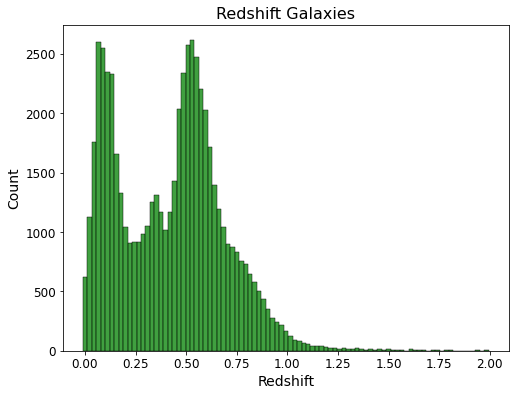

In [6]:
df_galaxy = df_clean[df_clean['Class'] == 0]
plt.figure(figsize=(8, 6))
sns.histplot(data=df_galaxy, x='redshift', color='green', palette='Set2', kde=False)
plt.xlabel("Redshift", fontsize=14)  # X-axis label
plt.ylabel("Count", fontsize=14)  # Y-axis label
plt.title("Redshift Galaxies", fontsize=16)  # Title

plt.xticks(fontsize=12)  # Adjust tick label size
plt.yticks(fontsize=12)

plt.show()

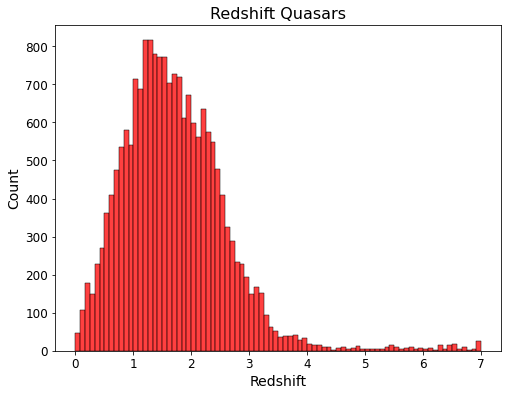

In [7]:
df_qso = df_clean[df_clean['Class'] == 1]

plt.figure(figsize=(8, 6))
sns.histplot(data=df_qso, x='redshift', color='red', palette='Set2', kde=False)

plt.xlabel("Redshift", fontsize=14)  # X-axis label
plt.ylabel("Count", fontsize=14)  # Y-axis label
plt.title("Redshift Quasars", fontsize=16)  # Title

plt.xticks(fontsize=12)  # Adjust tick label size
plt.yticks(fontsize=12)

plt.show()

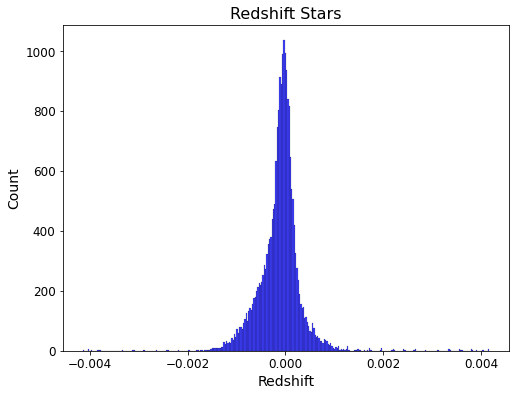

In [8]:
df_star = df_clean[df_clean['Class'] == 2]

plt.figure(figsize=(8, 6))
sns.histplot(data=df_star, x='redshift', color='blue', palette='Set2', kde=False)

plt.xlabel("Redshift", fontsize=14)  # X-axis label
plt.ylabel("Count", fontsize=14)  # Y-axis label
plt.title("Redshift Stars", fontsize=16)  # Title

plt.xticks(fontsize=12)  # Adjust tick label size
plt.yticks(fontsize=12)

plt.show()

In [52]:
#standardization

#turning the Class values into categorical data
df=df.rename(columns = {'class':'Class'})
df.Class = df.Class.astype('category')
cat_columns = df.select_dtypes(['category']).columns
cat_columns
df[cat_columns] = df[cat_columns].apply(lambda x: x.cat.codes)

#cleaning the data
df = df[(df['u'] >= 0)]

scaled_data = []


for class_label in df['Class'].unique():
    class_data = df[df['Class'] == class_label]
    
    X_class = class_data.drop('Class', axis=1)
    
    # Standardize features
    scaler = preprocessing.StandardScaler()
    X_scaled_class = scaler.fit_transform(X_class)
    
    #put everything together in a pandas dataframe, list
    X_scaled_class_df = pd.DataFrame(X_scaled_class, columns=X.columns)
    X_scaled_class_df['Class'] = class_label
    scaled_data.append(X_scaled_class_df)

df_scaled = pd.concat(scaled_data)
df_scaled = df_scaled.sample(frac=1, random_state=42).reset_index(drop=True)

print(df_scaled.head())
print(df_scaled.describe())

          u         g         r         i         z  redshift  Class
0  0.570340  0.649606  0.430847  0.185668  0.208027  0.804958      0
1  0.967264  0.913671  1.599093  1.370657  1.910968  1.349944      0
2  1.181667  0.833969  0.545435  0.293870  0.301345  0.840452      0
3 -0.198981  1.361867  1.080012  0.977959  0.483577  1.928409      0
4 -1.391224 -1.577911 -1.648820 -1.701319 -1.753648 -1.153359      0
                  u             g             r             i             z  \
count  9.999900e+04  9.999900e+04  9.999900e+04  9.999900e+04  9.999900e+04   
mean   6.773216e-16  5.349741e-16 -1.642888e-15  6.191065e-16 -9.250981e-16   
std    1.000005e+00  1.000005e+00  1.000005e+00  1.000005e+00  1.000005e+00   
min   -7.053823e+00 -6.244818e+00 -7.624421e+00 -7.215705e+00 -8.186187e+00   
25%   -7.400444e-01 -7.765487e-01 -8.053676e-01 -7.852490e-01 -7.504946e-01   
50%    5.640979e-02  2.234617e-01  1.911984e-01  1.616470e-01  1.322394e-01   
75%    6.807203e-01  7.232590e-01

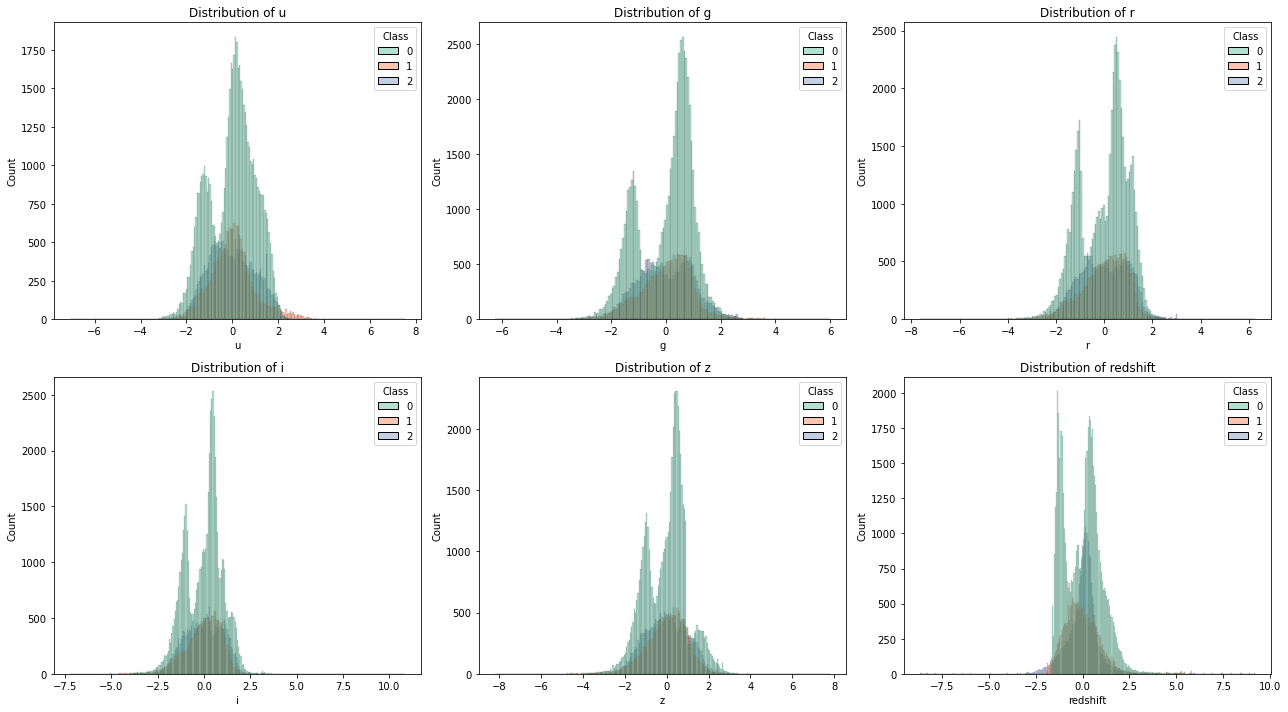

In [53]:
features = ['u', 'g', 'r', 'i', 'z', 'redshift']
target = 'Class' 

# Create a grid of subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))
axes = axes.flatten()

for idx, feature in enumerate(features):
    sns.histplot(data=df_scaled, x=feature, hue=target, multiple="layer", palette='Set2', ax=axes[idx], kde=False)
    
    # Set title for each subplot
    axes[idx].set_title(f'Distribution of {feature}')
    axes[idx].set_xlabel(feature)

# Adjust layout to avoid overlap
plt.tight_layout()
plt.show()

In [56]:
#normalizing

#turning the Class values into categorical data
df_clean=df_clean.rename(columns = {'class':'Class'})
df_clean.Class = df_clean.Class.astype('category')
cat_columns = df_clean.select_dtypes(['category']).columns
cat_columns
df_clean[cat_columns] = df_clean[cat_columns].apply(lambda x: x.cat.codes)

X = df_clean.drop('Class', axis=1)
y = df_clean['Class']

#normalize features
scaler = preprocessing.MinMaxScaler()  #default range [0, 1]
X_normalized = scaler.fit_transform(X)

#put everything together in a pandas dataframe, list
X_normalized = pd.DataFrame(X_normalized, columns=X.columns)
df_normalized = pd.concat([X_normalized, y.reset_index(drop=True)], axis=1)

print(df_normalized.head(10))
print(df_normalized.describe())

          u         g         r         i         z  redshift  Class
0  0.591347  0.558050  0.535344  0.427665  0.464377  0.091831      0
1  0.632603  0.584423  0.646203  0.515986  0.607035  0.112389      0
2  0.654888  0.576463  0.546218  0.435729  0.472194  0.093170      0
3  0.511384  0.629186  0.596946  0.486717  0.487460  0.134210      0
4  0.387463  0.335579  0.337999  0.287021  0.300043  0.017959      0
5  0.573420  0.608393  0.582279  0.475761  0.502398  0.204328      1
6  0.480763  0.505971  0.562346  0.491292  0.546921  0.084946      1
7  0.516570  0.546034  0.532623  0.441877  0.467223  0.069358      0
8  0.615402  0.561906  0.546246  0.440860  0.472712  0.095423      0
9  0.493476  0.451891  0.473598  0.412337  0.457321  0.001419      2
                  u             g             r             i             z  \
count  99999.000000  99999.000000  99999.000000  99999.000000  99999.000000   
mean       0.508807      0.480163      0.497408      0.424098      0.463126   
std 

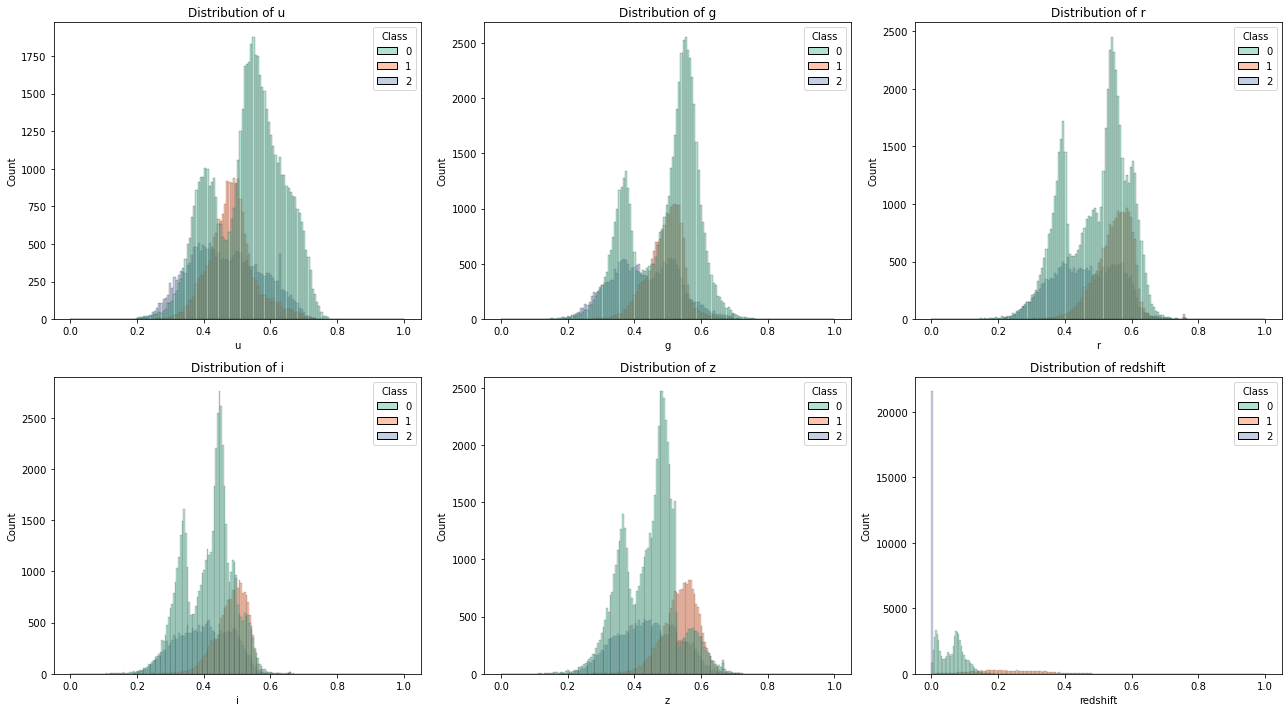

In [57]:
features = ['u', 'g', 'r', 'i', 'z', 'redshift']
target = 'Class' 

# Create a grid of subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))
axes = axes.flatten()

for idx, feature in enumerate(features):
    sns.histplot(data=df_normalized, x=feature, hue=target, multiple="layer", palette='Set2', ax=axes[idx], kde=False)
    
    # Set title for each subplot
    axes[idx].set_title(f'Distribution of {feature}')
    axes[idx].set_xlabel(feature)

# Adjust layout to avoid overlap
plt.tight_layout()
plt.show()